# Problem statement:
This dataset has 18 columns and 10000 rows. Our task is to analyze the dataset and predict the class of server by developing a supervised machine learning model.

In [70]:
# Import all the required liabrary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.feature_selection import RFE

In [40]:
#Load HR Data Set
df = pd.read_csv("Skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.



In [41]:
#check the shape of data
df.shape

(10000, 18)

In [42]:
#Check if any missing value present in data
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [43]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [44]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [45]:
df.drop(['objid','specobjid'],axis=1,inplace=True)

In [46]:
categorical_col =[]
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique())<=50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("=================================")
        

class : ['STAR' 'GALAXY' 'QSO']


# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

In [47]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

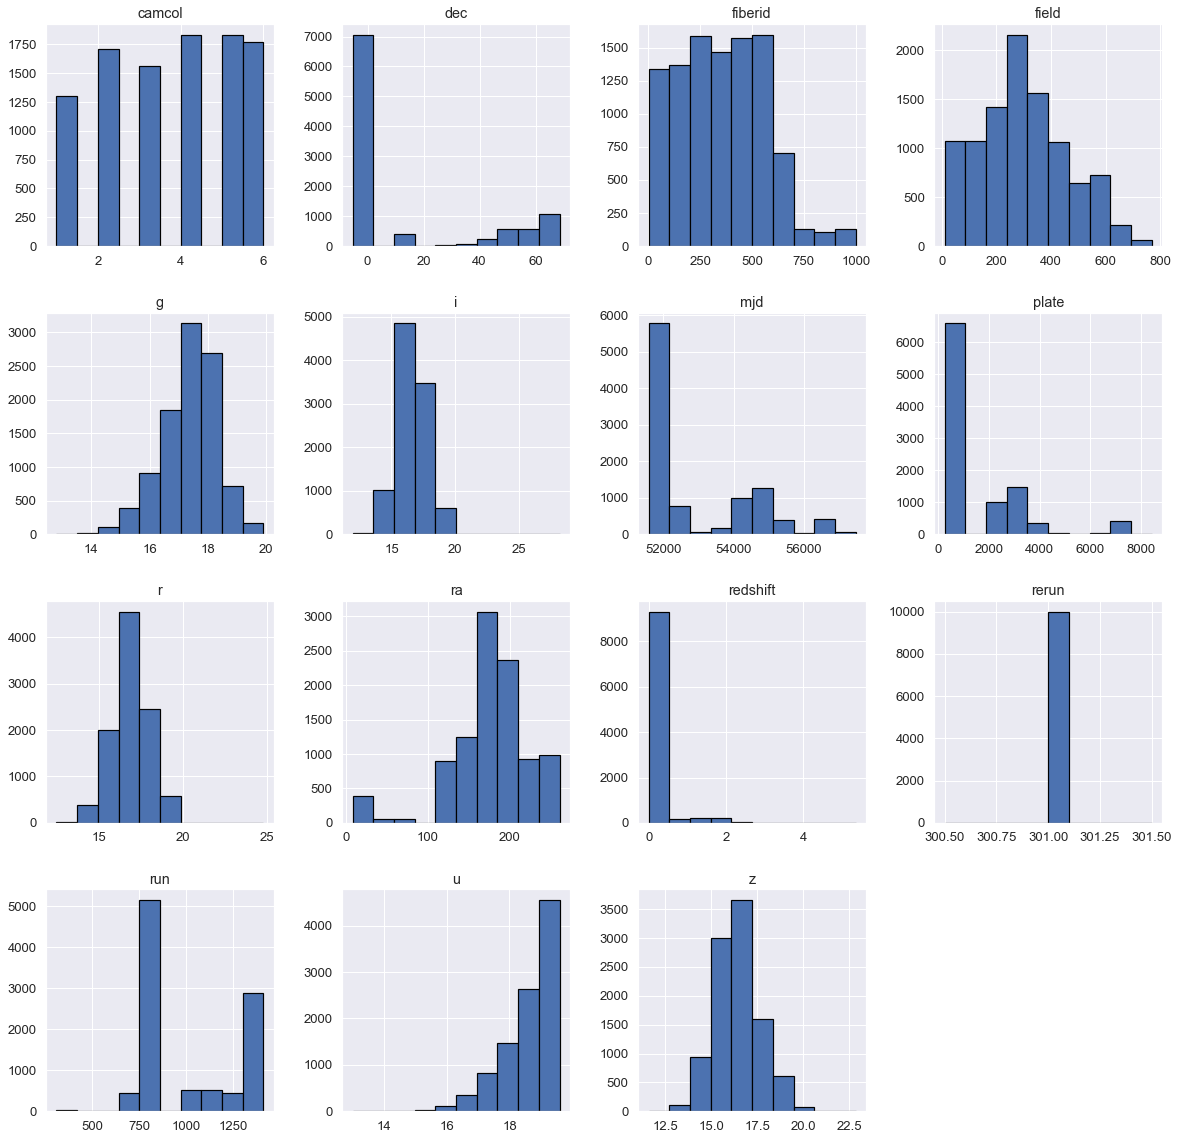

In [48]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

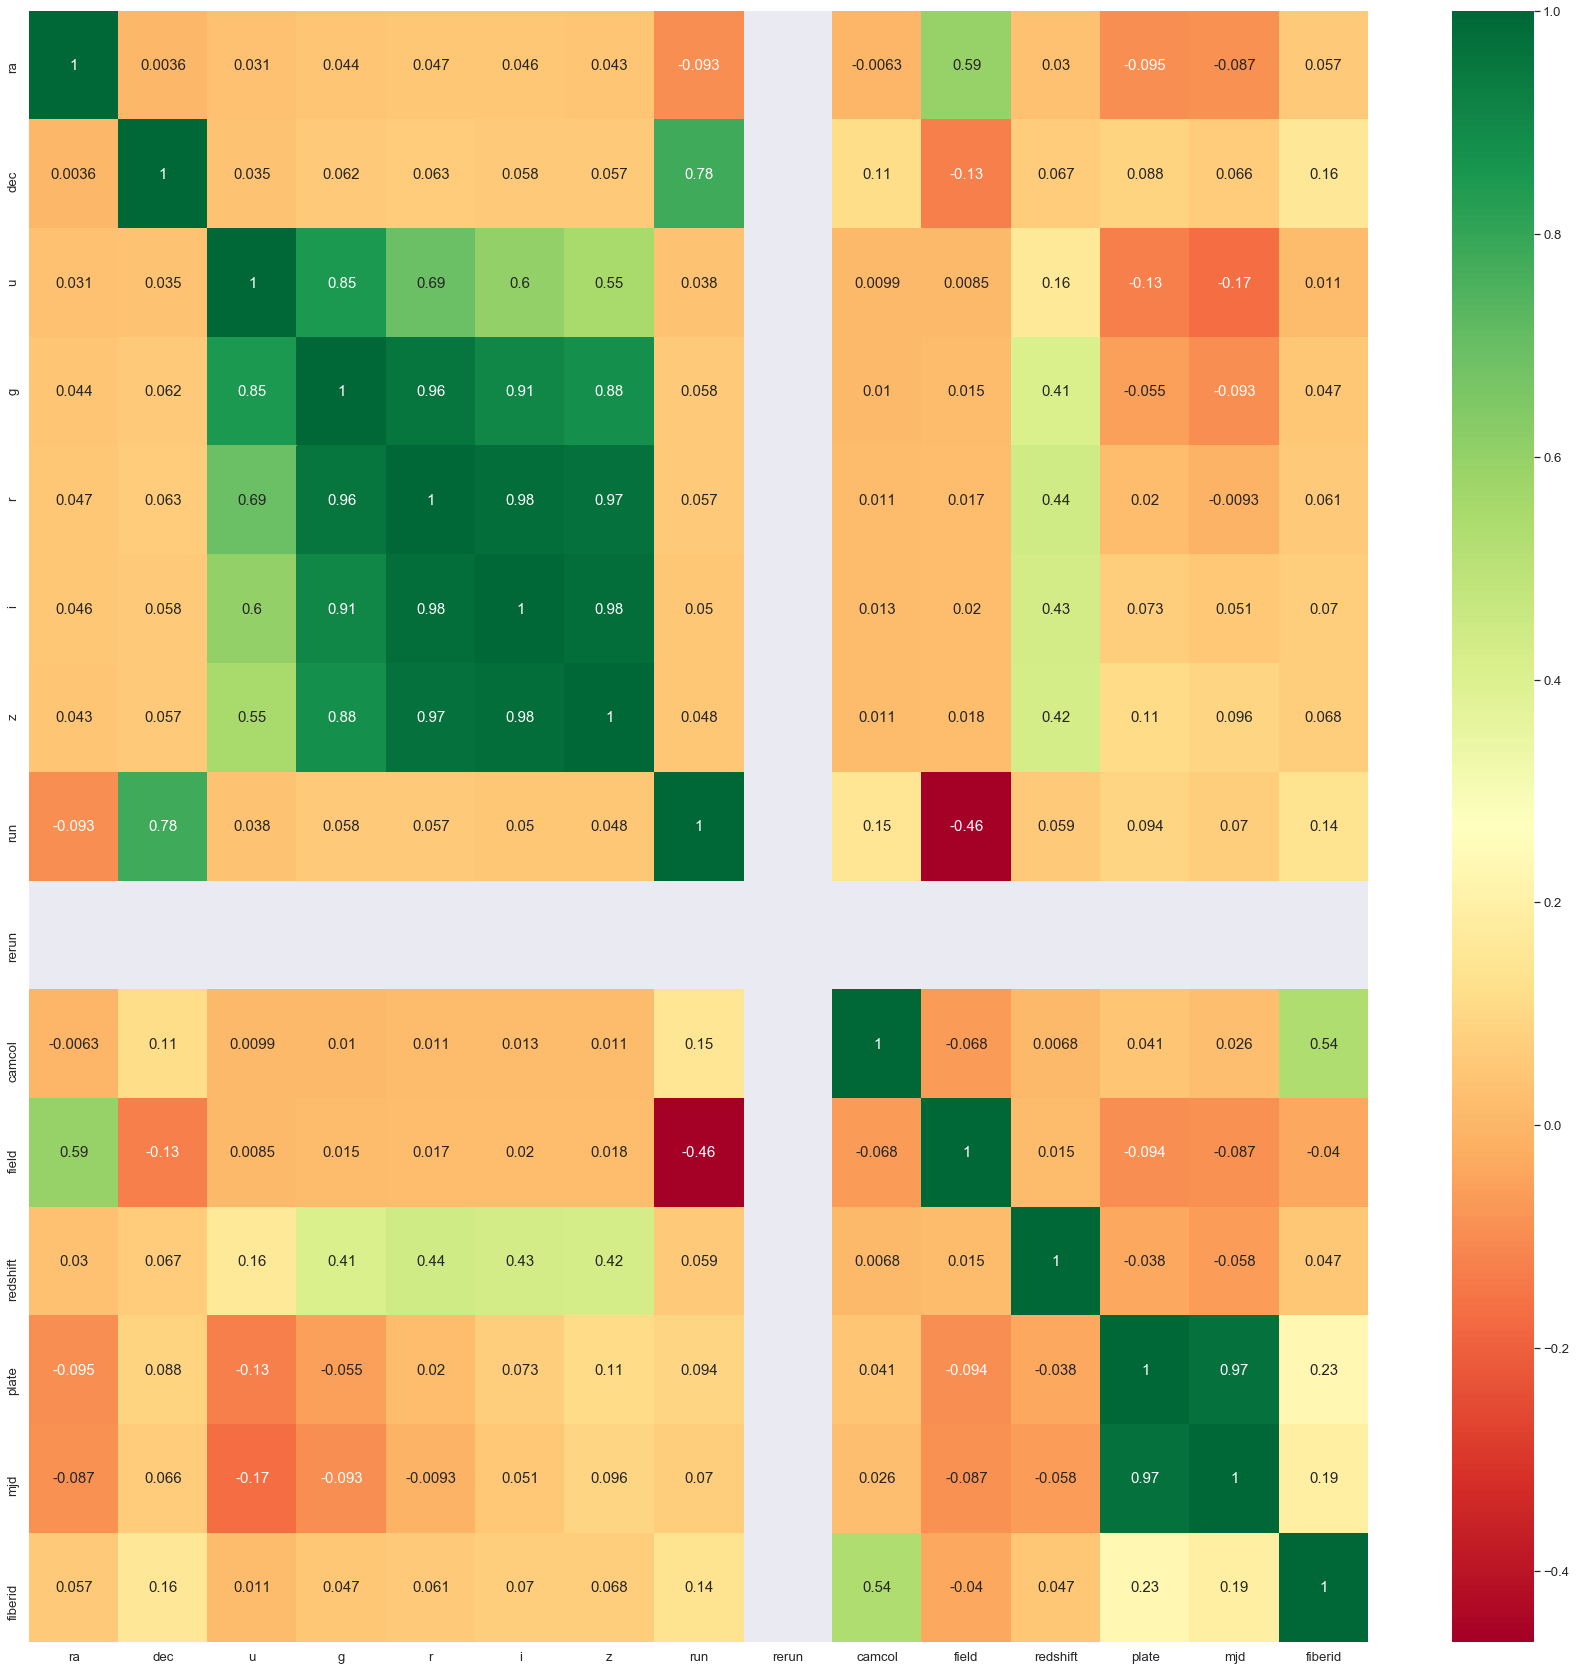

In [49]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

ra             AxesSubplot(0.125,0.772143;0.168478x0.107857)
dec         AxesSubplot(0.327174,0.772143;0.168478x0.107857)
u           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
g           AxesSubplot(0.731522,0.772143;0.168478x0.107857)
r              AxesSubplot(0.125,0.642714;0.168478x0.107857)
i           AxesSubplot(0.327174,0.642714;0.168478x0.107857)
z           AxesSubplot(0.529348,0.642714;0.168478x0.107857)
run         AxesSubplot(0.731522,0.642714;0.168478x0.107857)
rerun          AxesSubplot(0.125,0.513286;0.168478x0.107857)
camcol      AxesSubplot(0.327174,0.513286;0.168478x0.107857)
field       AxesSubplot(0.529348,0.513286;0.168478x0.107857)
redshift    AxesSubplot(0.731522,0.513286;0.168478x0.107857)
plate          AxesSubplot(0.125,0.383857;0.168478x0.107857)
mjd         AxesSubplot(0.327174,0.383857;0.168478x0.107857)
fiberid     AxesSubplot(0.529348,0.383857;0.168478x0.107857)
dtype: object

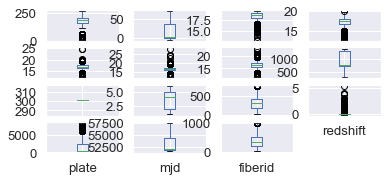

In [50]:
#check outliers
df.plot(kind='box',subplots=True,layout=(6,4))

# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [51]:
#Check if any missing value present in data
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
rerun       0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [55]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [58]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['class']= label_encoder.fit_transform(df['class']) 

df['class'].unique() 


array([2, 0, 1])

# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the class by developing a supervised machine learning model and we want to identify a relation between our output and remaining independent features . This scenario is a classic example of classification.

We are provided with 10000 rows of the labeled dataset tagged with the output column “Class” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression

SVC()

DecisionTreeRegressor()

KNeighborsClassifier


# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [60]:
x = df.drop('class', axis=1)
y = df['class']

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 10% of the data we have and the remaining 90% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=44)

In [62]:
model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=7)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.79
[[491   0  17]
 [ 83   0  14]
 [ 96   0 299]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       508
           1       0.00      0.00      0.00        97
           2       0.91      0.76      0.82       395

    accuracy                           0.79      1000
   macro avg       0.55      0.57      0.55      1000
weighted avg       0.73      0.79      0.75      1000



accuaracy score of 0.79
[[491   0  17]
 [ 83   0  14]
 [ 96   0 299]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       508
           1       0.00      0.00      0.00        97
           2       0.91      0.76      0.82       395

    accuracy                           0.79      1000
   macro avg       0.55      0.57      0.55      1000
weighted avg       0.73      0.79      0.75      1000





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.988
[[501   6   1]
 [  4  93   0]
 [  1   0 394]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       508
           1       0.94      0.96      0.95        97
           2       1.00      1.00      1.00       395

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



accuaracy score of 0.778
[[470   4  34]
 [ 79   4  14]
 [ 83   8 304]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       508
           1       0.25      0.04      0.07        97
           2       0.86      0.77      0.81       395

    accuracy                           0.78      1000
   macro avg       0.62      0.58      0.57      1000
weighted avg       0.74      0.78      0.75      1000





# we can observe that Random Forest Regressor algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of LogisticRegression() is 79%

Accuracy score of SVC() is 79%

Accuracy score of DecisionTreeClassifier() is 98%

Accuracy score of KNeighborsClassifier is 77%

Hence we can say that out all algorithems DecisionTreeClassifier() is best for this problem till now however we will use cross validation to select best model.

# Model Validation¶

In [63]:
clf = DecisionTreeClassifier(random_state=44)

scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
scores

array([0.9815, 0.9855, 0.9865, 0.98  , 0.987 ])

In [64]:
x_train.shape

(9000, 15)

# Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [65]:

#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


#grid search
#specify model
lm = DecisionTreeClassifier(random_state=44)
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'accuracy',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                            class_weight=None,
                                                            criterion='gini',
                                                            max_depth=None,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                                            min_weight_fraction_leaf=0.0,
                                                            presort='depr

In [66]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.547526,0.138559,0.004022,0.000347,1,{'n_features_to_select': 1},0.982778,0.980556,0.982778,0.982778,...,0.982111,0.000889,13,0.999861,0.999722,0.999722,0.999722,0.999861,0.999778,0.000068
1,1.454304,0.150065,0.004010,0.000947,2,{'n_features_to_select': 2},0.982778,0.981667,0.981667,0.980556,...,0.982556,0.001912,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,1.398380,0.162836,0.003201,0.001601,3,{'n_features_to_select': 3},0.985000,0.982222,0.983333,0.983333,...,0.984778,0.002758,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,1.363759,0.072690,0.003617,0.001965,4,{'n_features_to_select': 4},0.988333,0.982778,0.985556,0.987778,...,0.986667,0.002250,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,1.329299,0.108805,0.003502,0.001845,5,{'n_features_to_select': 5},0.986667,0.983889,0.985000,0.988889,...,0.986222,0.001700,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,1.239106,0.092804,0.004002,0.000001,6,{'n_features_to_select': 6},0.985556,0.985000,0.985556,0.987778,...,0.986333,0.001197,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,1.214342,0.130012,0.005046,0.001718,7,{'n_features_to_select': 7},0.986667,0.983889,0.986111,0.987222,...,0.986000,0.001133,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,1.126035,0.121942,0.003202,0.001601,8,{'n_features_to_select': 8},0.985000,0.982778,0.982778,0.986667,...,0.985000,0.002018,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.973371,0.107539,0.003220,0.001610,9,{'n_features_to_select': 9},0.981111,0.982778,0.984444,0.986111,...,0.984111,0.001944,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.805329,0.017944,0.002394,0.001954,10,{'n_features_to_select': 10},0.983333,0.983333,0.985000,0.987222,...,0.985000,0.001532,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


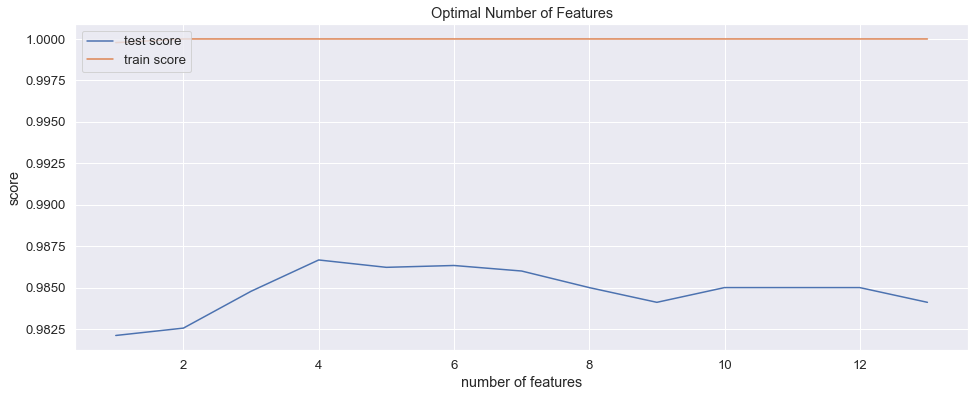

In [67]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [68]:
# final model
n_features_optimal = 4

lm =  DecisionTreeClassifier()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.992


# Save the model using Pickle¶

In [69]:
# Save the model using pickle
import pickle

filename = "pickleDTCfile.pkl"
pickle.dump(rfe, open(filename, 'wb'))


# Conclusion:
we achieved highest accuracy score of 99% by using DecisionTreeClassifier which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the Class of Server.